<a href="https://colab.research.google.com/github/ptremmy/classification-ML/blob/main/MIT_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order (2).csv


In [ ]:
## load neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
##
foodhub_data=pd.read_csv('foodhub_order.csv')



Summary of restaurant_name:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

Summary of rating:
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

Summary of cuisine_type:
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

Summary of day_of_the_week:
day_of_the_week
Weekend    1351

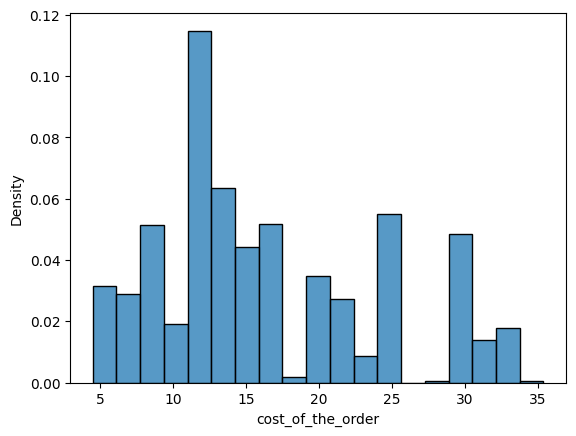

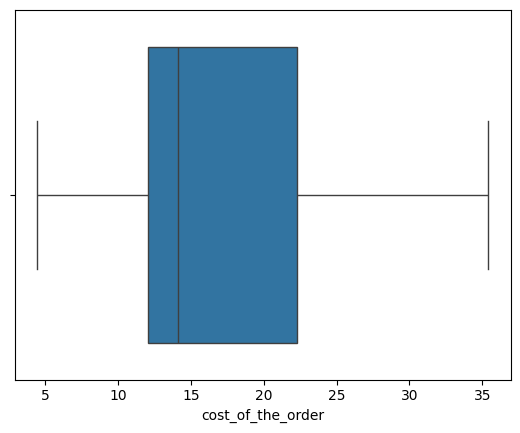

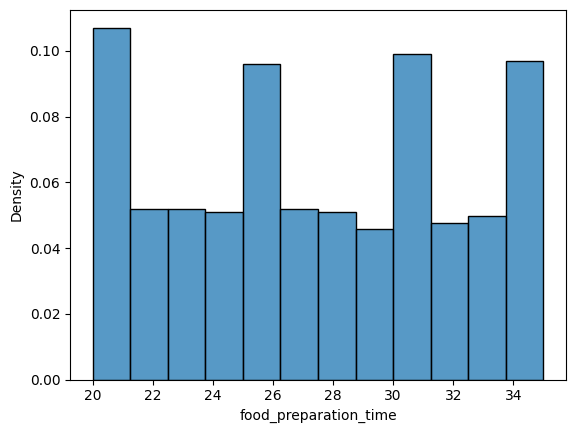

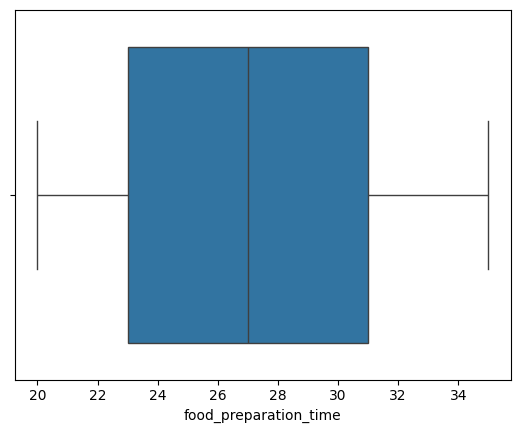

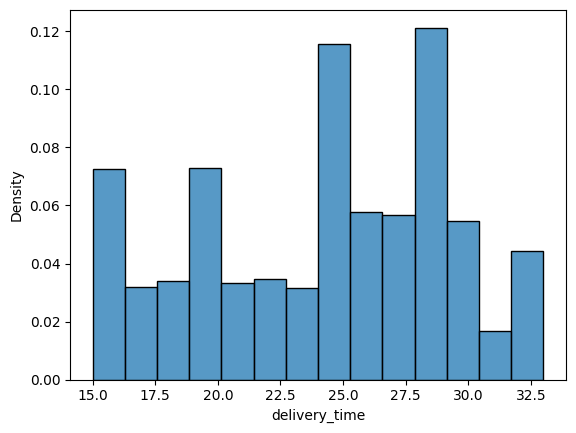

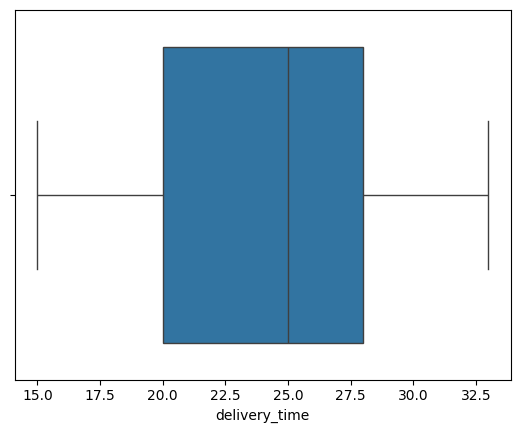

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


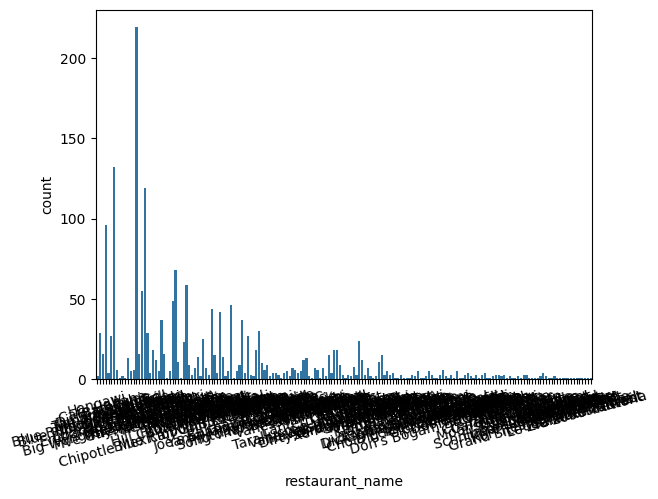

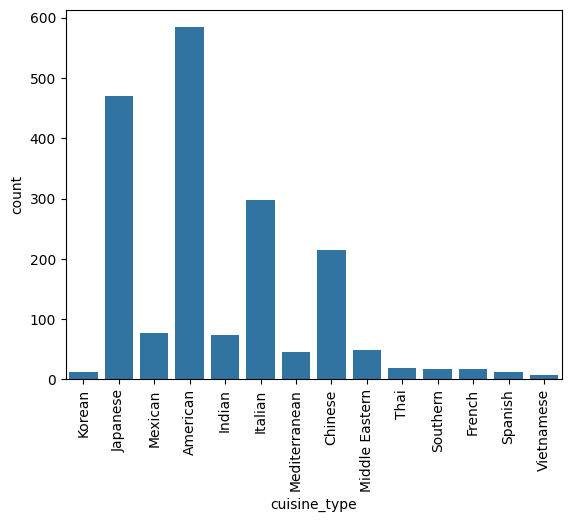

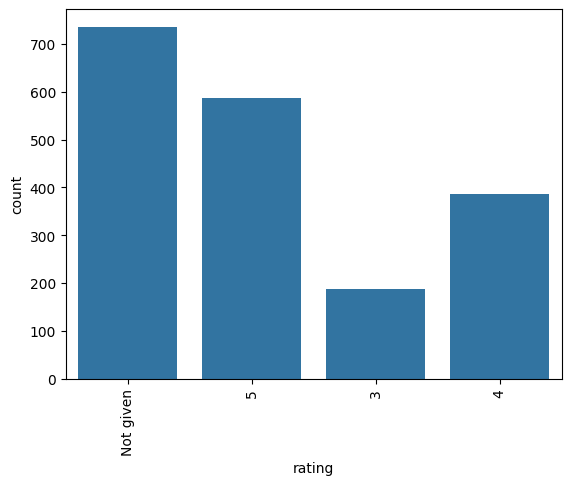

Correlation Matrix:
                       order_id  customer_id  cost_of_the_order  \
order_id               1.000000    -0.013960           0.021171   
customer_id           -0.013960     1.000000          -0.001322   
cost_of_the_order      0.021171    -0.001322           1.000000   
food_preparation_time -0.007026    -0.030330           0.041527   
delivery_time          0.009690    -0.009885          -0.029949   

                       food_preparation_time  delivery_time  
order_id                           -0.007026       0.009690  
customer_id                        -0.030330      -0.009885  
cost_of_the_order                   0.041527      -0.029949  
food_preparation_time               1.000000       0.011094  
delivery_time                       0.011094       1.000000  


<Figure size 1200x1000 with 0 Axes>

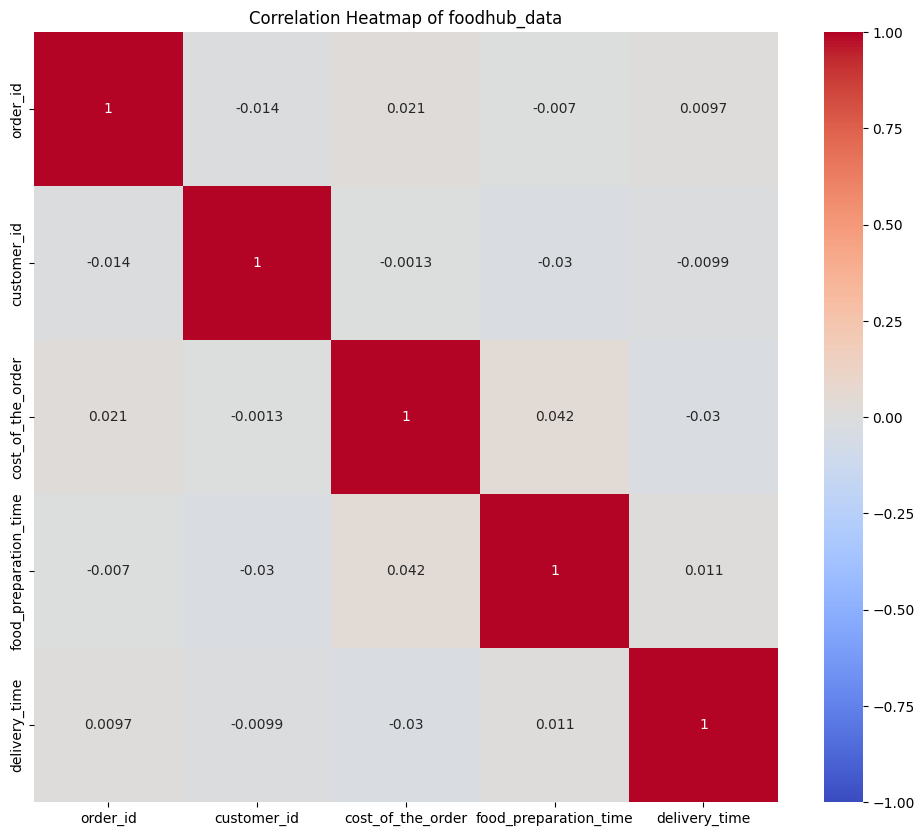


Highly correlated pairs:
Series([], dtype: float64)


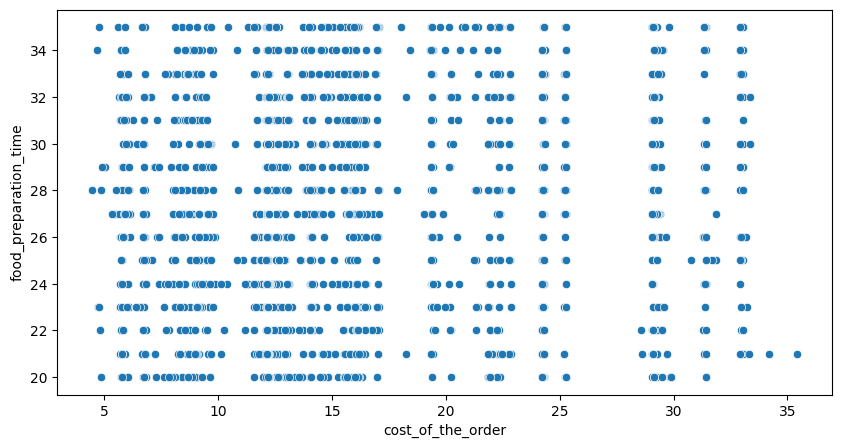

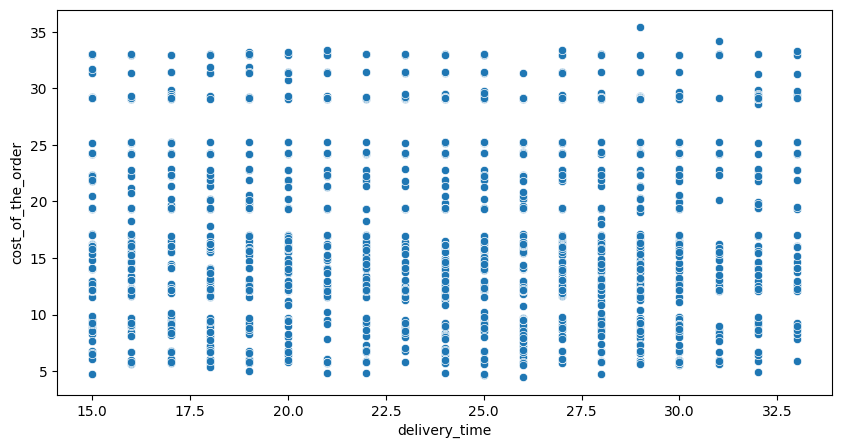

In [ ]:
## check the data
foodhub_data.head()
## check the data comments:
## a. Provides the summary overview of the data
##b. From the table , we can see that columns order_id, customer_id, food_preparation_time and delivery_time are discrete data; cost_of_the_order is a continuous data;
##cuisine_type , restaurant_name and day_of_the_week are qualitative nominal data; rating is categorical and ordinal data.

## obtain the summary statistics of the table

# Display summary statistics - quantitative data
foodhub_data.describe().T
## a. All rows  for order_id and customer_id are all unique and distinct
## b. Also shows there 1898 rows in the table
## c. Columns restaurant_name , cuisine_type rating, and day of the week are categorical data and therefore they do not have mean, std, range and quartiles (25th and 75th)
## d. food_preparation_time and delivery_time and cost_of_the_order are continous variables and Python is unable to identify any unique number
## The distribution of order costs is right-skewed (mean > median), with most orders costing between $12.08 and $22.30, but some orders costing as much as $35.41.
## e. Cost of the order- The average cost is 16.50 and the median is 14.14; this means the distribution for this column is right skewed. The spread of the cost from the average cost is 7.50 and means that aboout two-third of the cost lie between + or - 7.50 of the 16.50.
## f.Food preparation time - The average time for food preparation is 27.4 minutes and similar to the median time of 27 minutes. This shows that food preparation time is nearly normally distributed with very few outliers to the right. As such the maximum time is 35 minutes
##Food preparation times are relatively consistent, with most preparations taking between 23 and 31 minutes. The distribution is roughly symmetric (mean ≈ median) .
## . Delivery time - The average delivery time for the order is 24.2 minutes, which is slightly lower than the median time of 25 minutes. The delivery time is nearly normally distributed but slightly negatively skewed as mean is slightly lower than the median. The spread around the delivery time shows that the order could be delivered not more 5 minutes of the average time or 5 minutes prior to the time.
##Overall delivery times are fairly consistent, with most deliveries taking between 20 and 28 minutes. The distribution is roughly symmetric (mean ≈ median).


## are there missing values?
foodhub_data.isnull().sum()

# there are no missing values for any of the columns

## are there any duplicate rows in the table?
foodhub_data.duplicated().sum()

# there is no duplicate row


## Categorical data summary

categorical_columns = ['restaurant_name', 'rating', 'cuisine_type', 'day_of_the_week']

# Function to summarize categorical columns
def summarize_categorical(df, cat_columns):
    summary = {}
    for col in cat_columns:
        summary[col] = df[col].value_counts()
    return summary

# Generate the summary
summary = summarize_categorical(foodhub_data, categorical_columns)

# Display the summary
for column, summary_data in summary.items():
    print(f"Summary of {column}:\n{summary_data}\n")

# If you need the summary as a DataFrame
summary_df = pd.DataFrame({col: foodhub_data[col].value_counts() for col in categorical_columns})

# Display summary DataFrame
print(summary_df)

## Interpretations for categorical varaibles
#Summary of restaurant_name:
#This table shows the frequency of orders from different restaurants.
#The most popular restaurant is Shake Shack with 219 orders.
#The Meatball Shop is second with 132 orders.
#Blue Ribbon Sushi is third with 119 orders.
#There are 178 unique restaurants in total.
#Many restaurants (like Sushi Choshi, Dos Caminos Soho, La Follia, Philippe Chow, and 'wichcraft) have only 1 order each.
#This suggests a long-tail distribution where a few restaurants are very popular, but there's a large variety of less frequently ordered from restaurants.
##Summary of rating:
#This table shows the distribution of ratings given to orders.
#"Not given" is the most common category with 736 instances. This suggests that many customers don't provide ratings.
#Among the given ratings:
#5-star ratings are most common (588)
#Followed by 4-star ratings (386)
#3-star ratings are least common (188)
#There are no 1 or 2-star ratings visible in this summary, which could mean either they don't exist or are very rare.
#The distribution of ratings is skewed towards higher ratings, which is common in many rating systems.
#Summary of cuisine_type:
#This table shows the frequency of different cuisine types in the orders.
#American cuisine is the most popular with 584 orders.
#Japanese cuisine is second with 470 orders.
#Italian cuisine is third with 298 orders.
#Chinese cuisine is fourth with 215 orders.
#Other cuisines like Mexican, Indian, Middle Eastern, and Mediterranean have fewer orders.
#The least common cuisines in this dataset are Vietnamese (7 orders), Spanish (12 orders), and Korean (13 orders).
# This distribution gives insight into the popularity of different cuisine types among the customers in this dataset.
#Overall Insights:
#There's a wide variety of restaurants, but a few are significantly more popular than others.
#Customers tend to give high ratings when they do rate their orders, but many orders are not rated.
#American and Asian (particularly Japanese and Chinese) cuisines are the most popular among the customers in this dataset.

## Display information about the data
foodhub_data.info()
## shows that columns order_id,customer_id, food_preparation_time and delivery_time are integers
## cost_of_the_order has decimal and is float
## restaurant_name , cuisine_type , day_of_the_week and rating are categorical data and labelled as object in Python



## Univariate analysis

## a. Cost of the order
sns.histplot(data=foodhub_data, x="cost_of_the_order",stat="density")
plt.show()
sns.boxplot(data=foodhub_data, x="cost_of_the_order")
plt.show()

# a. interpretation of the Cost of the order plots
## This is right skewed
## There are no outliers

## b. Food preparation time
sns.histplot(data=foodhub_data, x="food_preparation_time",stat="density")
plt.show()
sns.boxplot(data=foodhub_data, x="food_preparation_time")
plt.show()

# . interpretation of the food preparation plots
## This is nearly normal but slightly skewed to the right
## More orders are prepared beyond the average food preparation time

## c. Delivery  time
sns.histplot(data=foodhub_data, x="delivery_time",stat="density")
plt.show()
sns.boxplot(data=foodhub_data, x="delivery_time")
plt.show()

##. interpretation of the delivery plots
## This is nearly normal but slightly skewed to the left
## large proportions of order are delivered below the average delivery time

## Count plots for the categorical varaibles

sns.countplot(data=foodhub_data, x="restaurant_name")
plt.xticks(rotation=15)
plt.show()

sns.countplot(data=foodhub_data, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()

## American cuisine is the most ordered while the second and third are Japanese and Italian respectively


sns.countplot(data=foodhub_data, x="rating")
plt.xticks(rotation=90)
plt.show()


## Most customers (736) did not give any rating of their order but of the people that rated , most of them gave 5 (588) and followed by 4
 ##(<400)

### Bivariate data analysis


## Select only numeric columns for correlation analysis
numeric_columns = foodhub_data.select_dtypes(include=['int64', 'float64']).columns
foodhub_data_numeric = foodhub_data[numeric_columns]

# Compute the correlation matrix
correlation_matrix = foodhub_data_numeric.corr()


# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of foodhub_data')
plt.show()

#  Find the most correlated pairs
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", ascending=False)
high_correlation = sorted_pairs[(sorted_pairs > 0.5) | (sorted_pairs < -0.5)]
high_correlation = high_correlation[high_correlation != 1.0]  # Remove self-correlations

print("\nHighly correlated pairs:")
print(high_correlation)

## correlation comments
#cost_of_the_order:
#Has a very weak positive correlation with order_id (0.021171).
#Has a very weak negative correlation with customer_id (-0.001322).
#Has a very weak positive correlation with food_preparation_time (0.041527).
#Has a very weak negative correlation with delivery_time (-0.029949).
#food_preparation_time:
#Has a very weak positive correlation with cost_of_the_order (0.041527).
#Has a very weak positive correlation with delivery_time (0.011094).
#delivery_time:
#Has very weak positive correlations with order_id (0.009690) and food_preparation_time (0.011094).
#Has very weak negative correlations with customer_id (-0.009885) and cost_of_the_order (-0.029949).
#Insights:
#Weak Correlations: All the correlations are very weak, with values close to 0. This suggests that there are no strong linear relationships between any pairs of variables in this dataset.

### We want to explore this relationship furthermore with scatterplots

plt.figure(figsize=(10, 5))
sns.scatterplot(data=foodhub_data, x="cost_of_the_order", y="food_preparation_time")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=foodhub_data, x="delivery_time", y="cost_of_the_order")
plt.show()

## scatterplots comments
# shows that there appears to be weak associations between these variables

## Conclusion


